# Self-consumption SFH Calculation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [3]:
os.chdir('/home/MA')

In [4]:
total_elec_load = pd.read_pickle('Calculations/Spain/load_Spain_modern_full_retrofit.pkl')

In [5]:
PV_production = pd.read_pickle('Calculations/Spain/PV_production_Spain.pkl')

In [6]:
power_balance = pd.DataFrame()

In [7]:
power_balance['consumption'] = total_elec_load

In [8]:
power_balance['from PV'] = PV_production

In [9]:
power_balance['exchange grid'] = PV_production - total_elec_load

In [10]:
power_balance['to Grid'] = (PV_production - total_elec_load).clip(lower=0)

In [11]:
power_balance['from Grid'] = (total_elec_load - PV_production).clip(lower=0)

In [12]:
power_balance = power_balance.fillna(0)

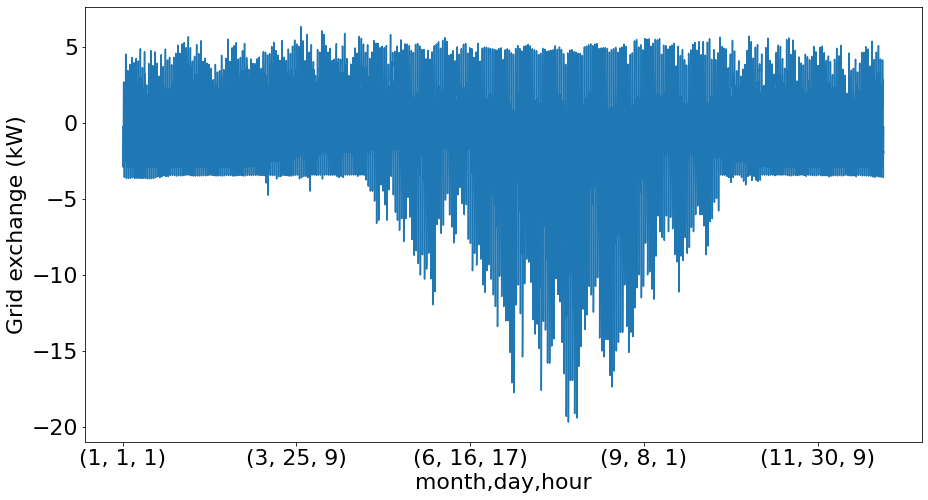

In [13]:
power_balance['exchange grid'].plot(ylabel = 'Grid exchange (kW)');

In [14]:
power_balance.head()

consumption  from PV  exchange grid  to Grid  from Grid
month day hour                                                         
1     1   1        0.274793      0.0      -0.274793      0.0   0.274793
          2        0.278476      0.0      -0.278476      0.0   0.278476
          3        0.282668      0.0      -0.282668      0.0   0.282668
          4        0.287585      0.0      -0.287585      0.0   0.287585
          5        0.292901      0.0      -0.292901      0.0   0.292901

In [15]:
power_balance.to_pickle('Calculations/Spain/power_balance_Spain.pkl')

**No storage calculations**

Self-consumption share

In [16]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['from PV'])

0.4189078170406484

Curtailment calculation

In [17]:
sum(power_balance['to Grid'])/sum(power_balance['from PV'])

0.5810921829593543

PV share without storage

In [18]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['consumption'])

0.31093112035154585